# Lab Segmentation 1

In [101]:
from commonfunctions import *
import skimage.io as io
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Requirement 1

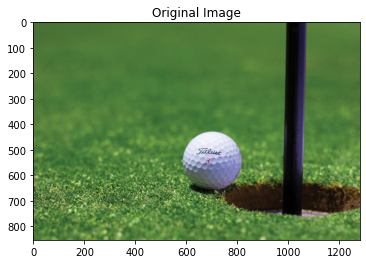

In [106]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
# read image golf
image = io.imread('./imgs/exp1/golf.jpeg')
image_float = image.astype(float)
show_images([image],["Original Image"])

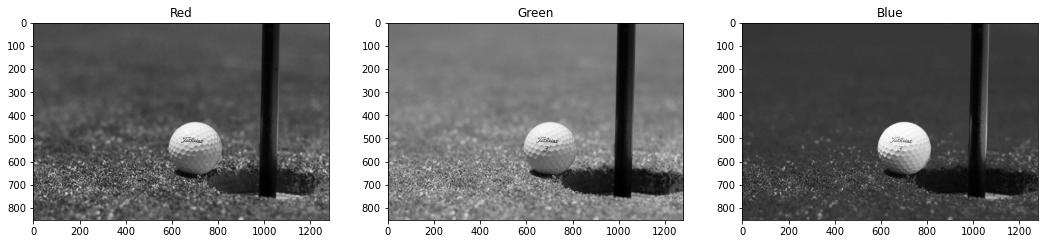

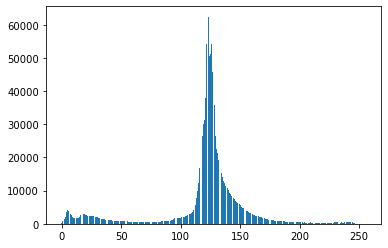

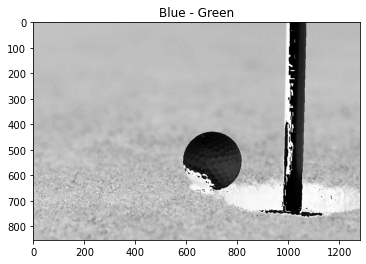

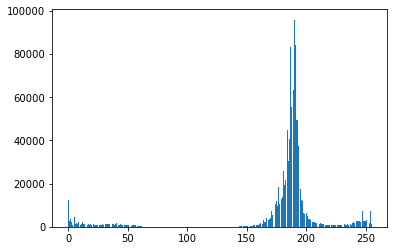

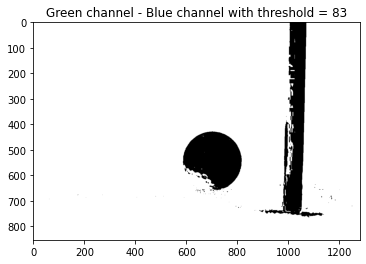

In [107]:
# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
show_images([R,G,B],['Red','Green','Blue'])
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
# ->  Green
# TODO:4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
histGreen = histogram(G,nbins=256) # get histogram
showHist(G) # show histogram
histGreen  = histGreen[0]
# green_threshold_up = histGreen.tolist().index(max(histGreen)) # get threshold
# green_threshold = histGreen.tolist().index(min(histGreen[50:100])) # get threshold
# G_thes =  G>green_threshold # thresholding
# show_images([G_thes],['Green after thresholding'])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
diff = B - G #from 0 to 255
show_images([diff],['Blue - Green'])
hist = histogram(diff,nbins=256) # get histogram
showHist(diff) # show histogram
myHist  = hist[0]
threshold = myHist.tolist().index(min(myHist[50:200]))


# 6- display the binarized image
diff = diff > threshold
show_images([diff],[f'Green channel - Blue channel with threshold = {threshold}'])


### Requirement 2

In [63]:
# 1- Get the required RGB color (Using a color picker)
pixelValue = [86,101,42]
# 2- Read image
image_cufe = io.imread('./imgs/exp2/cufe.png')
# 3- extract R, G and B channels (as float)
R_float = image_cufe[:,:,0].astype(float)
G_float = image_cufe[:,:,1].astype(float)
B_float = image_cufe[:,:,2].astype(float)

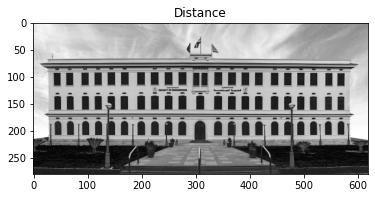

threshold =  32


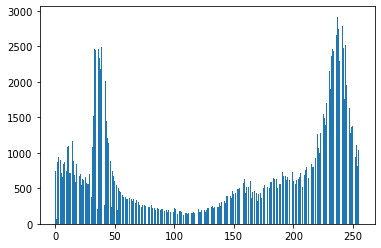

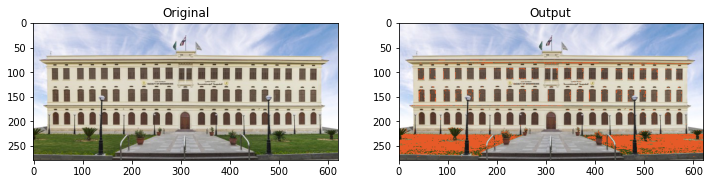

In [64]:
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
diff_R = np.zeros((R_float.shape[0],R_float.shape[1]))
diff_G = np.zeros((G_float.shape[0],G_float.shape[1]))
diff_B = np.zeros((B_float.shape[0],B_float.shape[1]))

for x in range(diff_R.shape[0]):
    for y in range(diff_R.shape[1]):
        diff_R[x,y] = pixelValue[0] - R_float[x,y]
        diff_G[x,y] = pixelValue[1] - G_float[x,y]
        diff_B[x,y] = pixelValue[2] - B_float[x,y]
# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
output_image = np.copy(image_cufe)
distance = np.zeros((diff_R.shape[0],diff_R.shape[1]))

# 6-  create a mask by thresholding the differences
for x in range(distance.shape[0]):
    for y in range(distance.shape[1]):
        distance[x,y] = np.sqrt((diff_R[x,y])**2 + (diff_G[x,y])**2 + (diff_B[x,y])**2)
show_images([distance],['Distance'])
showHist(distance)
distHist = histogram(distance,nbins=256)
distHist = distHist[0]
distThreshold = distHist.tolist().index(max(distHist[0:100]))
print("threshold = ",distThreshold)

thres_distance = distance <distThreshold #distance after thresholding

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
output_image[thres_distance == 1,0] = 230 
output_image[thres_distance == 1,1] = 90 
output_image[thres_distance == 1,2] = 40 
# for x in range(thres_distance.shape[0]):
#     for y in range(thres_distance.shape[1]):
#         if thres_distance[x,y] == True:
#             output_image[x,y,0] = 230
#             output_image[x,y,1] = 90
#             output_image[x,y,2] = 40

# 8- show the image or save it
show_images([image_cufe,output_image],["Original","Output"])